In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
def obj(x):
    return 100.0*(x[1] - x[0]**2)**2 + (1 - x[0])**2

In [3]:
def grad(x):
    g = np.zeros(x.shape[0])
    g[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    g[1] = 200*(x[1] - x[0]**2)
    
    return g

In [4]:
def hess(x):
    h = np.zeros((x.shape[0], x.shape[0]))
    h[0][0] = -400*x[1] + 1200*x[0]**2 + 2
    h[0][1] = -400*x[0]
    h[1][0] = -400*x[0]
    h[1][1] = 200
    
    return h

In [5]:
def graddes(x):
    eta = 1
    
    alpha = 0.01
    beta = 0.5
    
    g = grad(x)
    
    while obj(x - eta*g) > obj(x) + alpha*eta*la.norm(g)**2:
        eta = beta*eta
    
    x = x - eta*g
    #print(eta)
    
    return x

In [6]:
def newton(x):
    eta = 1

    alpha = 0.05
    beta = 0.8
    
    g = grad(x)
    hess_inv = la.inv(hess(x))
    
    nstep = np.dot(hess_inv, g)
    dec = np.dot(g, nstep)
    
    while obj(x - eta*nstep) > obj(x) + alpha*eta*la.norm(nstep)**2:
        eta = beta*eta
    
    x = x - eta*nstep
    #print(eta)
    
    return x, dec

In [7]:
def descent(update, x):
    error = []
    xstar = np.array([1., 1.])
    
    T = 100
    
    for t in range(T):
        x = update(x)
        
        if  (t % 1 == 0) or (t == T-1):
            error.append(la.norm(x - xstar))
            
    return x, error

In [8]:
def descent2(update, x):
    error = []
    xstar = np.array([1., 1.])
    
    T = 100
    tol = 1e-3
    
    for t in range(T):
        x, dec = update(x)
        #print(dec)
        
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(x - xstar))
        
        if dec/2 <= tol:
            return x, error
    
    return x, error

In [9]:
xinit = np.array([-1.2, 1.])
x_gd, error_gd = descent(graddes, xinit)

In [10]:
x_n, error_n = descent2(newton, xinit)

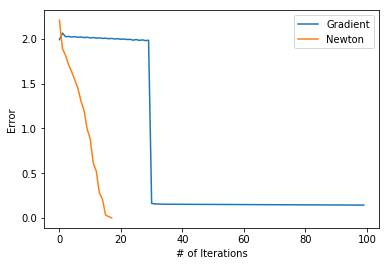

In [11]:
%matplotlib inline

plt.plot(error_gd, label="Gradient")
plt.plot(error_n, label="Newton")
plt.xlabel("# of Iterations")
plt.ylabel("Error")
plt.legend()